Jordan Hoover  
CSC570R Fall 2016  
Assignment: Advanced Validation Techniques lab  
Python ver= 3.5  

In [1]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn  import cross_validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df=pd.read_csv("breast_cancer.csv")

# First step is the EDA and feature selection
For this assignment,I tested out doing the EDA with some plots  
None of the variables by themselves seemed to give that useful of info, but all seemed  
to be somewhat related to predicting malignat or not based on the  
plots that I made, besides Unnamed 0 and id number so I dropped those

In [3]:
# drop Unnamed 0 and id number columns, b/c they are irrelevant
df=df.drop(df.columns[0:2], axis=1)

In [4]:
# drop any na values (there didn't appear to be any in this dataset)
df=df.dropna(axis=0)


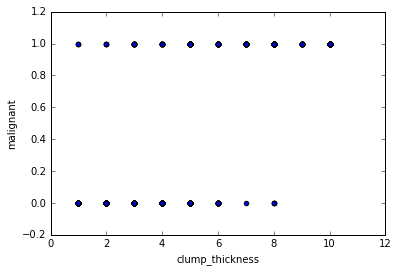

In [5]:
# plot each feature against malignant
df.plot.scatter(df.columns[0], df.columns[9])

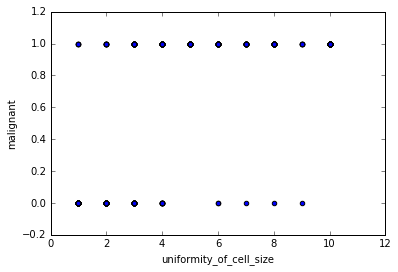

In [6]:
# plot each feature against malignant
df.plot.scatter(df.columns[1], df.columns[9])

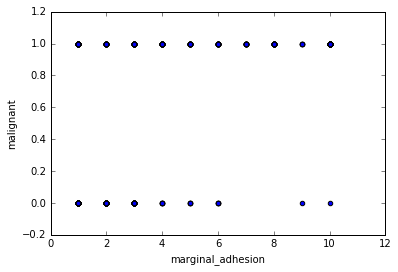

In [7]:
# plot each feature against malignant
df.plot.scatter(df.columns[3], df.columns[9])

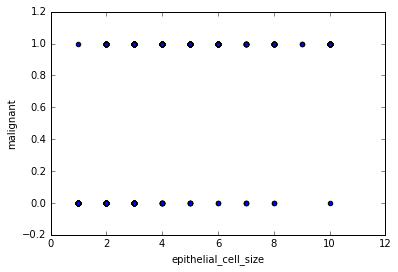

In [8]:
# plot each feature against malignant
df.plot.scatter(df.columns[4], df.columns[9])

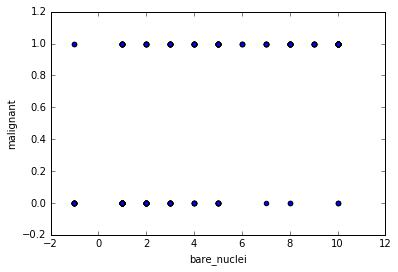

In [9]:
# plot each feature against malignant
df.plot.scatter(df.columns[5], df.columns[9])

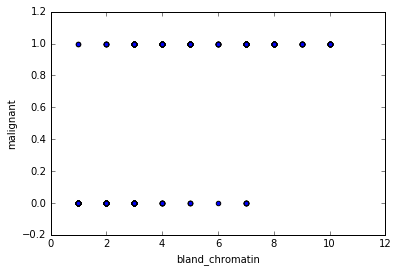

In [10]:
# plot each feature against malignant
df.plot.scatter(df.columns[6], df.columns[9])

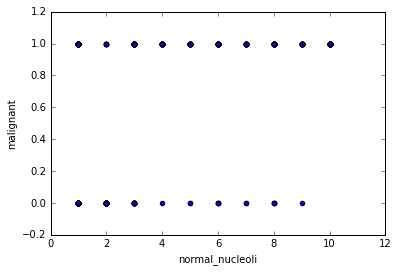

In [11]:
# plot each feature against malignant
df.plot.scatter(df.columns[7], df.columns[9])

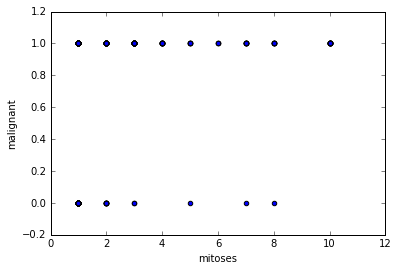

In [12]:
# plot each feature against malignant
df.plot.scatter(df.columns[8], df.columns[9])

# Create a random forest model and evaluate results
I will create a random forest model to predict malignant  
with the holdout method and k-fold cross validation with k=10,  
and evaluate the performance

In [13]:
# split off the dependent variable
#y = df[df.columns[9]]
#df = df.drop(df.columns[9], axis = 1)

# faster way: 
y=df.pop(df.columns[9])

In [14]:
# create train test split for holdout method
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=.2, random_state=42)

In [15]:
# a base rate accuracy model
def base_rate_model(X):
    y =np.zeros(X.shape[0])
    return y

In [16]:
y_base_rate=base_rate_model(X_test)
print("Base rate accuracy is %.2f" % accuracy_score(y_test, y_base_rate))

Base rate accuracy is 0.68


In [17]:
# Use grid search to train the model
n_estimators = [300,400,500]
max_features = ['auto', 'sqrt','log2']
min_samples_split = [3,5,7]


rfc = RandomForestClassifier(n_jobs=50, random_state=42)
#Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(rfc,
                         dict(n_estimators=n_estimators,
                              max_features=max_features,
                              min_samples_split=min_samples_split
                              ), cv=None, n_jobs=-1)

In [18]:
estimator.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=50,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [300, 400, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_split': [3, 5, 7]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [19]:
best_rfc = estimator.best_estimator_

In [20]:
ypreds=best_rfc.predict(X_test)

# Evaluation of holdout method scores: 
AUC, Accuracy, Precision, Recall

In [21]:
# AUC
roc = best_rfc.predict_log_proba(X_test)[:,1]
print("AUC for RandomForestClassifier is: ", roc_auc_score(y_test, roc))

AUC for RandomForestClassifier is:  0.996023391813


AUC looks really good.

In [22]:
# Accuracy
print("Accuracy Score for RF  is: %.5f " % accuracy_score(y_test, ypreds))

Accuracy Score for RF  is: 0.96429 


In [23]:
# Precision and Recall
# Precision is the % of correct predictions that the model made for a class level  (tp/tp+fp)
# Recall is the % correct classifications that the model made for a class level out of all the instances that actually were
# that specific class level (tp/ tp+ fn).  

#So recall shows how many the model missed becasuse it is how many it got right out of how many it should have gotten right,
# so true positives that the model predicted out of all actual true positives(which is tp+fn)

print(classification_report(y_test, ypreds))

             precision    recall  f1-score   support

          0       0.97      0.98      0.97        95
          1       0.95      0.93      0.94        45

avg / total       0.96      0.96      0.96       140



Precision: out of all the instances the model identified   
as not malignant(0), 97% of those actually were not malignant,    
so there is a 3% chance that it will identify a malignant as not malignant.   

Out of all the instances the model identified as being malignant,  
95% of them actually were malignant,  
So there is a 5% chance that it will identify a not-malignant as malignant

Recall:  98% of the people identified as not malignant are actually  
not malignant.
93% of people identified as malignant are actually malignant

# Implement k-fold crossvalidation, k=10
Now I will compare the holdout method to K-Fold Cross Validation

In [24]:
# do 10 folds of cross-validation
scores = cross_validation.cross_val_score(best_rfc, df, y, cv = 10)

In [25]:
scores

array([ 0.92957746,  0.97142857,  0.97142857,  0.91428571,  0.98571429,
        0.97142857,  0.97142857,  0.98571429,  0.98550725,  0.98550725])

In [26]:
mean_score = scores.mean()
std_dev = scores.std()
std_error = scores.std() / math.sqrt(scores.shape[0])
ci =  2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print ("Score is %f +/-  %f" % (mean_score, ci))
print ('95 percent probability that if this experiment were repeated over and over the average score would be between %f and %f' % (lower_bound, upper_bound))

Score is 0.967202 +/-  0.016992
95 percent probability that if this experiment were repeated over and over the average score would be between 0.950210 and 0.984194


# Summary of K-Fold vs the holdout method
The cross validation seems to improves the results ever so slightly.  
But there is very little difference.  
I think the reason there is so little difference might have something to do with  
the model already doing very well on predicting Malignant vs Not Malignant  
and that k-fold cross-validation would have more of an impact if  
there was more data and the model had a harder time getting to a high accuracy percentage.